In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# load the datasets
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [4]:
y_train = y_train.reshape(-1,)

In [5]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [6]:
# print the image sample
def plot_sample(X, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[0])
  plt.xlabel(classes[y[index]])

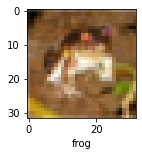

In [7]:
plot_sample(X_train, y_train, 0)

In [8]:
# normalizing values
X_train = X_train / 255
X_test = X_test / 255

In [9]:
# model building
ann = models.Sequential([
                         layers.Flatten(input_shape=(32,32,3)),   # input image
                         layers.Dense(3000, activation='relu'),   # first deep layer
                         layers.Dense(1000, activation='relu'),   # second deep layer
                         layers.Dense(10, activation='sigmoid'),  # number of categories
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 90s 57ms/step - loss: 1.8127 - accuracy: 0.3567
Epoch 2/5
1563/1563 [==============================] - 90s 57ms/step - loss: 1.6222 - accuracy: 0.4262
Epoch 3/5
1563/1563 [==============================] - 90s 57ms/step - loss: 1.5413 - accuracy: 0.4561
Epoch 4/5
1563/1563 [==============================] - 90s 58ms/step - loss: 1.4797 - accuracy: 0.4782
Epoch 5/5
1563/1563 [==============================] - 90s 58ms/step - loss: 1.4321 - accuracy: 0.4965


In [10]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 7s 22ms/step - loss: 1.5373 - accuracy: 0.4476


[1.5372523069381714, 0.44760000705718994]

In [11]:
cnn = models.Sequential([
                         # cnn
                         layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)), # check 32 features
                         layers.MaxPooling2D((2,2)),

                         layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                         layers.MaxPooling2D((2,2)),

                         # dense network
                         layers.Flatten(),
                         layers.Dense(64, activation='relu'),
                         layers.Dense(10, activation='softmax'),
])

In [12]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 56s 35ms/step - loss: 1.4781 - accuracy: 0.4648
Epoch 2/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.1339 - accuracy: 0.6006
Epoch 3/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.0044 - accuracy: 0.6498
Epoch 4/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9187 - accuracy: 0.6800
Epoch 5/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.8550 - accuracy: 0.7045
Epoch 6/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.8059 - accuracy: 0.7213
Epoch 7/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7628 - accuracy: 0.7346
Epoch 8/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7232 - accuracy: 0.7483
Epoch 9/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.6861 - accuracy: 0.7615
Epoch 10/10
1563/1563 [==============================] - 55s 35m

In [15]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.9626 - accuracy: 0.6885


[0.9626017808914185, 0.6884999871253967]

In [21]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

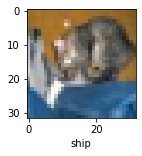

In [22]:
plot_sample(X_test, y_test, 1)

In [24]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.8244394e-04, 4.9073926e-05, 3.8219234e-03, 9.3481261e-01,
        8.9060649e-04, 5.2052911e-02, 6.1105532e-03, 3.3742815e-04,
        1.7150484e-03, 2.7428921e-05],
       [7.5401757e-03, 4.7289705e-01, 4.5813881e-06, 9.3121736e-07,
        1.3437949e-08, 4.1261895e-08, 1.4355105e-08, 4.2581533e-07,
        5.1951206e-01, 4.4697947e-05],
       [1.8465172e-01, 6.3819908e-02, 9.0501760e-04, 2.5204837e-02,
        5.1137302e-03, 2.6555893e-03, 2.5744317e-04, 7.5573724e-04,
        6.5676284e-01, 5.9873149e-02],
       [8.3507991e-01, 8.6724581e-03, 2.5888795e-02, 2.6070040e-03,
        1.2595736e-03, 3.6475813e-05, 3.7842727e-04, 1.8248815e-04,
        1.2588000e-01, 1.4852171e-05],
       [1.4420328e-06, 1.0061876e-06, 3.1225152e-02, 1.1866060e-02,
        6.8849665e-01, 3.8314906e-03, 2.6454511e-01, 1.1646503e-05,
        2.0192289e-05, 1.2494783e-06]], dtype=float32)

In [28]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [29]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

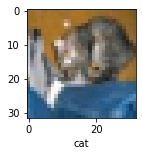

In [33]:
plot_sample(X_test, y_test, 1)

In [31]:
classes[y_classes[1]]

'ship'

In [35]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.74      0.73      1000
           1       0.84      0.80      0.81      1000
           2       0.46      0.71      0.56      1000
           3       0.54      0.46      0.50      1000
           4       0.63      0.65      0.64      1000
           5       0.68      0.54      0.60      1000
           6       0.78      0.77      0.77      1000
           7       0.72      0.75      0.74      1000
           8       0.78      0.81      0.79      1000
           9       0.88      0.66      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

